# 4.9 Data Visualization

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import dataset
path = r'C:\Users\Kid\01.2024 Instacart Basket Analysis Project'
df_ords_prods = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

#### 0. Optional: Handling 'regularity_flag' null values

In [3]:
df_ords_prods.loc[df_ords_prods['orders_frequency'].isna(), 'regularity_flag'] = 'Non-frequent customer'

In [4]:
df_ords_prods[df_ords_prods['orders_frequency'].isnull()]

order_id  user_id  order_number  orders_day_of_week  \
13645692    895835   159838             1                   0   
17251990    895835   159838             1                   0   
17622767    895835   159838             1                   0   
24138593    895835   159838             1                   0   
25880002    895835   159838             1                   0   

          order_hour_of_day  days_since_prior_order  first_order  product_id  \
13645692                 17                     NaN         True       10749   
17251990                 17                     NaN         True       33401   
17622767                 17                     NaN         True       23695   
24138593                 17                     NaN         True       21334   
25880002                 17                     NaN         True       22198   

          add_to_cart_order  reordered  ...        price_range  busiest_day  \
13645692                  3          0  ...  Mid-range product  Busiest day   
17251990                  6          0  ...  Mid-range product  Busiest day   
17622767                  2          0  ...  Low-range product  Busiest day   
24138593                  5          0  ...  Mid-range product  Busiest day   
25880002                  1          0  ...  Low-range product  Busiest day   

          busiest_days  busiest_period_of_day max_order  loyalty_flag  \
13645692   Busiest day            Most orders         1  New customer   
17251990   Busiest day            Most orders         1  New customer   
17622767   Busiest day            Most orders         1  New customer   
24138593   Busiest day            Most orders         1  New customer   
25880002   Busiest day            Most orders         1  New customer   

         average_price_spent spending_flag  orders_frequency  \
13645692                7.42   Low spender               NaN   
17251990                7.42   Low spender               NaN   
17622767                7.42   Low spender               NaN   
24138593                7.42   Low spender               NaN   
25880002                7.42   Low spender               NaN   

                regularity_flag  
13645692  Non-frequent customer  
17251990  Non-frequent customer  
17622767  Non-frequent customer  
24138593  Non-frequent customer  
25880002  Non-frequent customer  

[5 rows x 24 columns]

#### 1. Creating bar charts

<Axes: xlabel='orders_day_of_week'>

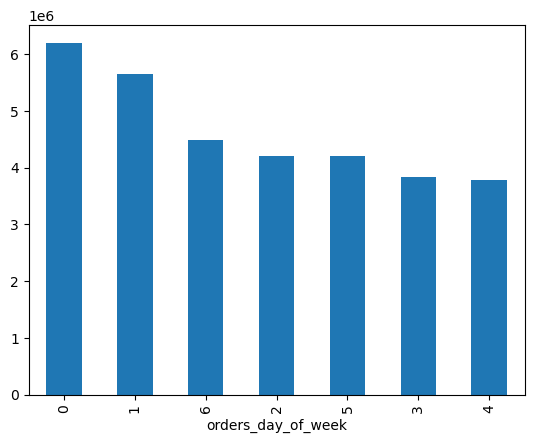

In [5]:
df_ords_prods['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

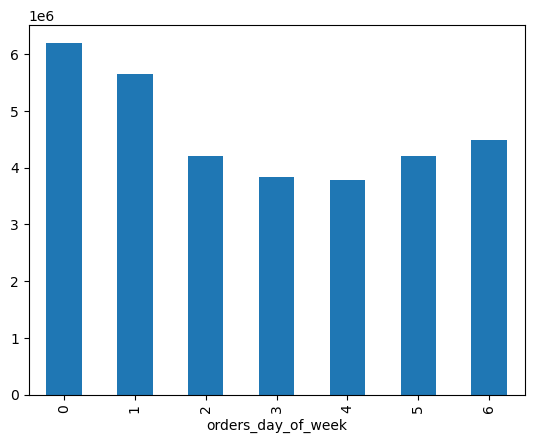

In [6]:
#using sort_index()
df_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

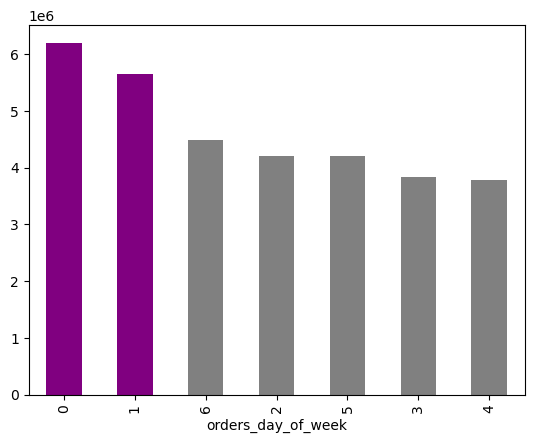

In [7]:
#save visualization into memory
bar_orders_day_of_week = df_ords_prods['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'purple', 'gray', 'gray', 'gray', 'gray', 'gray'])

In [8]:
#exporting the visualization
bar_orders_day_of_week.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_orders_dow.png'))

#### 02. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

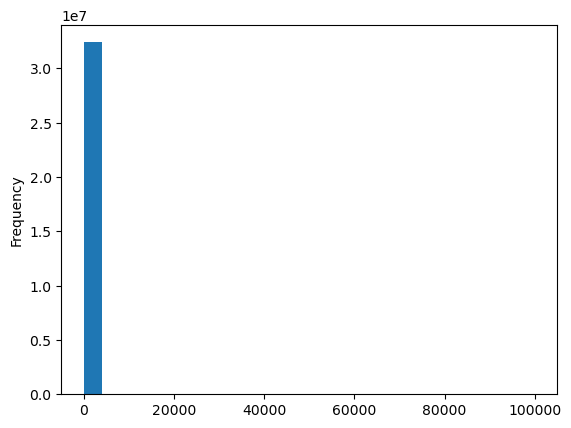

In [9]:
#creating a histogram
df_ords_prods['prices'].plot.hist(bins = 25)

##### The histogram indicates something off with the data. An outlier value for the 'prices' column: 99.999 is skewing the distribution result.

<Axes: xlabel='prices', ylabel='prices'>

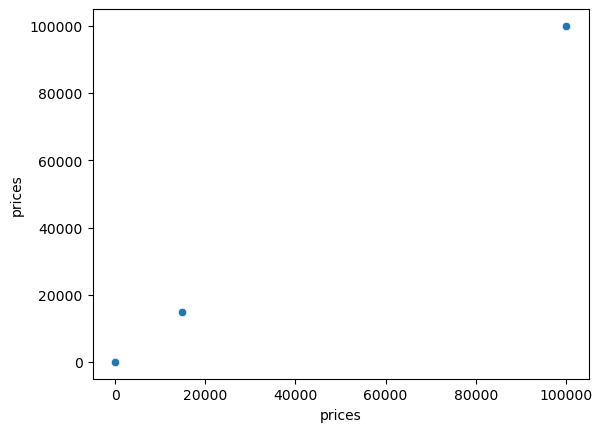

In [10]:
#creating a scatterplot for'prices'
sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods)

In [11]:
#investigating 'prices'
df_ords_prods[['order_id', 'prices']].loc[df_ords_prods['prices'] > 100].head(25)

order_id   prices
10030345    912404  14900.0
10030346    603376  14900.0
10030347   3264360  14900.0
10030348    892534  14900.0
10030349    229704  14900.0
10030350   2856927  14900.0
10030351   1871776  14900.0
10030352   2575782  14900.0
10030353    642211  14900.0
10030354    591140  14900.0
10030355   1116834  14900.0
10030356    260601  14900.0
10030357    573149  14900.0
10030358   2589688  14900.0
10030359    525880  14900.0
10030360    265986  14900.0
10030361   2920240  14900.0
10030362    500920  14900.0
10030363   1457337  14900.0
10030364   1916506  14900.0
10030365   1258862  14900.0
10030366   2881244  14900.0
10030367    379654  14900.0
10030368    156071  14900.0
10030369   2884554  14900.0

In [12]:
#handling odd values
df_ords_prods.loc[df_ords_prods['prices'] > 100, 'prices'] = np.nan

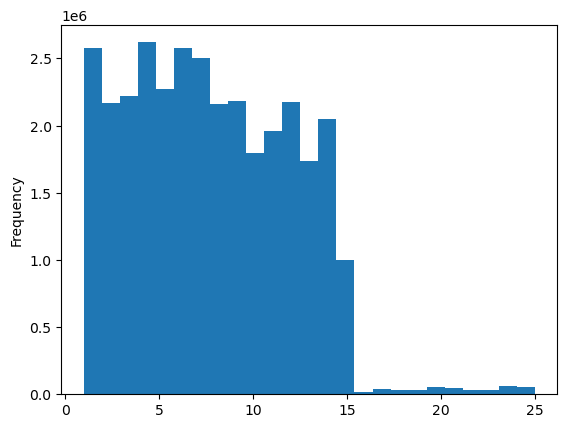

In [15]:
#reviewing charts
hist = df_ords_prods['prices'].plot(kind='hist', bins = 25)


In [16]:
hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'prices_distribution_hist.png'))

#### 03. Creating Line charts

#### IMPORTANT: Plotting a Line chart on large dataframes can be extremely exhaustive for your system's cpu and memory usage. Subsetting is not recommended in this case as it doesn't represent the entire population. To tackle this issue, we use 'Sampling' instead. 

In [18]:
#generating a seed
np.random.seed(4)

In [19]:
#preparing a True..False split list of 70%
dev = np.random.rand(len(df_ords_prods)) <= 0.7

In [20]:
#creating a 70/30 split
big = df_ords_prods[dev]
small = df_ords_prods[~dev]

In [21]:
#checking results
len(df_ords_prods) == len(big) + len(small)

True

In [22]:
#reducing number of columns
df_sample = small[['orders_day_of_week', 'prices']]

In [23]:
df_sample

orders_day_of_week  prices
0                          2     9.0
2                          3     9.0
3                          4     9.0
6                          1     9.0
10                         1     9.0
...                      ...     ...
32404841                   1     8.8
32404842                   2     8.8
32404843                   0     3.7
32404849                   3     3.7
32404850                   4     3.7

[9721098 rows x 2 columns]

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


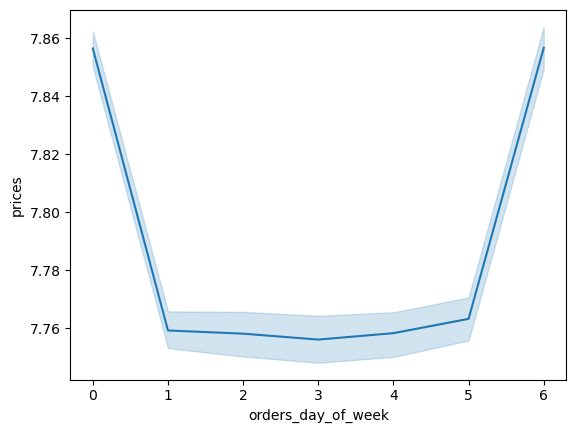

In [20]:
#creating a line chart
line_prices_dow = sns.lineplot(x = 'orders_day_of_week', y = 'prices', data = small)

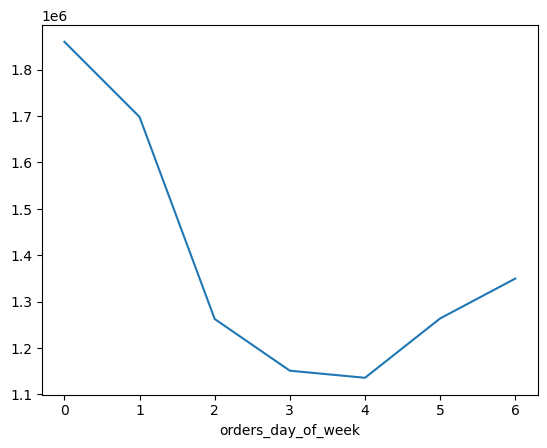

In [24]:
#orders by day of week
line = small.groupby('orders_day_of_week')['order_number'].size().plot(kind='line')

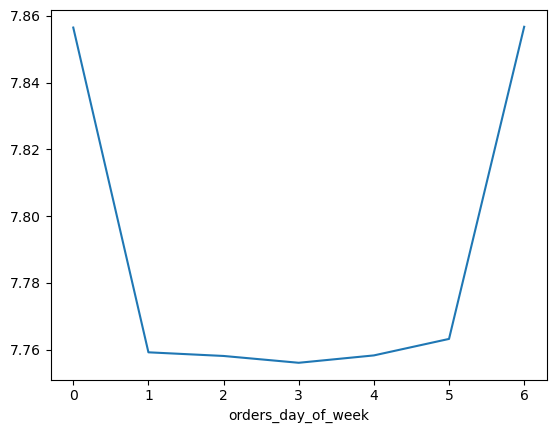

In [25]:
#prices by day of week
line = small.groupby('orders_day_of_week')['prices'].mean().plot(kind='line')

In [26]:
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'prices_dow_line.png'))

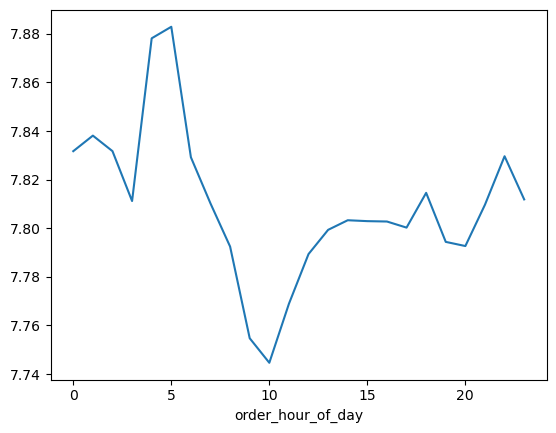

In [27]:
#avg prices by hour of day
line = small.groupby('order_hour_of_day')['prices'].mean().plot(kind='line')

In [28]:
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'prices_how_line.png'))